<a href="https://colab.research.google.com/github/davidmuna/Financial-Inclusion-Project/blob/master/David_Muna_Core_Week_2_IP.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# State of Financial Inclusion in Kenya, Rwanda, Tanzania, and Uganda.

## 1. Defining the Question

### a) Specifying the Data Analytic Question

> Predicting which individuals are most likely to have or use a bank account 


### b) Defining the Metric for Success
1.   To provide some key demographic factors that may drive individuals’ financial outcomes
2.   To provide indicators of the state of financial inclusion in Kenya, Rwanda, Tanzania, and Uganda.
3. To identify which individuals are more likely to open a bank account

### c) Understanding the context 


> Financial Inclusion remains one of the main obstacles to economic and human development in Africa
Despite the proliferation of mobile money in Africa and the growth of innovative fintech solutions, banks still play a pivotal role in facilitating access to financial services. Access to bank accounts enables households to save and facilitate payments while also helping businesses build up their credit-worthiness and improve their access to other financial services. 
My role as a Data Scientist is to predict which individuals are most likely to have or use a bank account and provide an indication of the state of financial inclusion in Kenya, Rwanda, Tanzania, and Uganda, while providing insights into some of the key demographic factors that might drive individuals’ financial outcomes.



*   The Null hypothesis is that 9.1 million adults (or 13.9% of the adult population in Kenya, Rwanda, Uganda and Tanzania) have access to a bank account.



### d) Recording the Experimental Design

1.   To define the question, the metric for success, the context, experimental design taken and the appropriateness of the available data to answer the Data Analytic Question
2.   To find and deal with outliers, anomalies, and missing data within the dataset.
3.   To perform univariate, bivariate and multivariate analysis recording your observations.
4. To implement the solution by performing factor analysis, principal component analysis, and discriminant analysis.
5. To challenge my solution by providing insights on how improvements can be made.

### e) Data Relevance

The dataset provided is relevant for performing univariate, bivariate, multivariate analysis and implementing solutions.  
*   [Dataset link](http://bit.ly/FinancialDataset)
*   [Dataset Description](http://bit.ly/VariableDefinitions)



## 2. Reading the Data

In [309]:
# Dataset url = http://bit.ly/FinancialDataset

#importing the necessary libraries to be used in the analysis
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import seaborn as sns

#uncomment and run the line below if researchpy module not found
!pip install -q researchpy 

import researchpy as rp
from scipy import stats
from sklearn import linear_model
import statsmodels.api as sm

In [302]:
#loading our dataframe description
description = pd.read_csv("http://bit.ly/VariableDefinitions")
description

,Variable Definitions,Unnamed: 1
0,country,Country interviewee is in.
1,year,Year survey was done in.
2,uniqueid,Unique identifier for each interviewee
3,location_type,"Type of location: Rural, Urban"
4,cellphone_access,"If interviewee has access to a cellphone: Yes, No"
5,household_size,Number of people living in one house
6,age_of_respondent,The age of the interviewee
7,gender_of_respondent,"Gender of interviewee: Male, Female"
8,relationship_with_head,The interviewee’s relationship with the head o...
9,marital_status,The martial status of the interviewee: Married...


In [303]:
#loading our dataframe 
data = pd.read_csv("http://bit.ly/FinancialDataset")

## 3. Checking the Data

In [304]:
# Determining the no. of records in our dataset
data.shape

(23524, 13)

In [305]:
# Previewing the top of our dataset
data.head(2)

,country,year,uniqueid,Has a Bank account,Type of Location,Cell Phone Access,household_size,Respondent Age,gender_of_respondent,The relathip with head,marital_status,Level of Educuation,Type of Job
0,Kenya,2018,uniqueid_1,Yes,Rural,Yes,3,24,Female,Spouse,Married/Living together,Secondary education,Self employed
1,Kenya,2018,uniqueid_2,No,Rural,No,5,70,Female,Head of Household,Widowed,No formal education,Government Dependent


In [306]:
# Previewing the bottom of our dataset
data.tail(2)

,country,year,uniqueid,Has a Bank account,Type of Location,Cell Phone Access,household_size,Respondent Age,gender_of_respondent,The relathip with head,marital_status,Level of Educuation,Type of Job
23522,Uganda,2018,uniqueid_2116,No,Urban,Yes,7,30,Female,Parent,Divorced/Seperated,Secondary education,Self employed
23523,Uganda,2018,uniqueid_2117,No,Rural,Yes,10,20,Male,Child,Single/Never Married,Secondary education,No Income


In [310]:
# Checking whether each column has an appropriate datatype
data.dtypes

#from results we will convert the float64 dtypes to integers

country                    object
year                        int64
uniqueid                   object
Has a Bank account         object
Type of Location           object
Cell Phone Access          object
household_size            float64
Respondent Age            float64
gender_of_respondent       object
The relathip with head     object
marital_status             object
Level of Educuation        object
Type of Job                object
dtype: object

## 4. External Data Source Validation

### a.Validation

A comparison was made with the following datasets
*   [FinAccess Kenya 2018.](https://fsdkenya.org/publication/finaccess2019/)
*   [Finscope Rwanda 2016.](http://www.statistics.gov.rw/publication/finscope-rwanda-2016)
*   [Finscope Tanzania 2017.](http://www.fsdt.or.tz/finscope/)
*   [Finscope Uganda 2018.](http://fsduganda.or.ug/finscope-2018-survey-report/)







## 5. Tidying the Dataset


 4.222798310469757

         year  household_size  Respondent Age
count 23,524          23,496          23,490
mean   2,017               4              39
std        1               2              17
min    2,016               0              16
25%    2,016               2              26
50%    2,017               3              35
75%    2,018               5              49
max    2,056              21             100


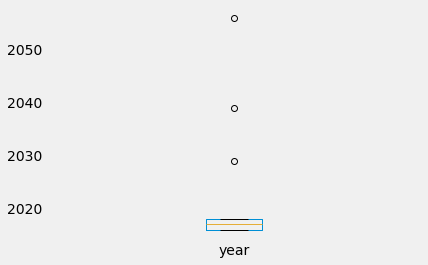

In [311]:
# Checking for Outliers and dealing with them using boxplots the 1.5(IQR) criteria respectively
#Viewing outliers in Year
data.boxplot(column =['year'], grid = False) 

#Using skew to determine if theres a normal distribution
print("\n", data['year'].skew())

#Describing the data
print("\n", data.describe())

#Year has a high skew to the right and 3 points from boxplot indicating presence of outliers. We will remove these few outliers
#eg years 2029, 2056 and 2039 which are Outliers

0.977652354434429


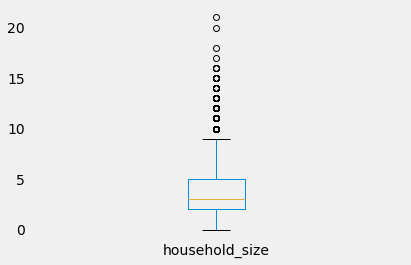

In [312]:
# Viewing outliers in Household Size
data.boxplot(column =['household_size'], grid = False) 

#Using skew to determine if theres a normal distribution
print(data['household_size'].skew())

#household_size has a high skew and multiple points from boxplot indicating presence of many outliers. eg 21 Household members

0.8418012375387167


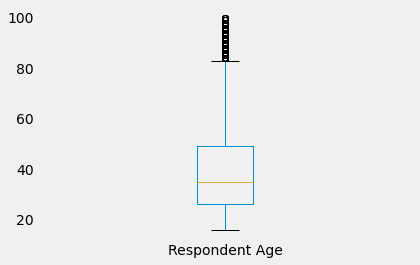

In [313]:
#Respondent Age
data.boxplot(column =['Respondent Age'], grid = False) 

#Using skew to determine if theres a normal distribution
print(data['Respondent Age'].skew())

#The age is skewed to the right indicating there're more older people in the population
#We will retain these values since max age is at 100

In [314]:
# Checking for Anomalies

#Unique values check
print(data.nunique())

#Based on dataset description in the link above, the year and level of education have anomalies.
print("\n",data['year'].unique())
print("\n", data['Level of Educuation'].unique())

country                      4
year                         6
uniqueid                  8735
Has a Bank account           2
Type of Location             2
Cell Phone Access            2
household_size              21
Respondent Age              85
gender_of_respondent         2
The relathip with head       6
marital_status               5
Level of Educuation          7
Type of Job                 10
dtype: int64

 [2018 2029 2056 2016 2039 2017]

 ['Secondary education' 'No formal education'
 'Vocational/Specialised training' 'Primary education'
 'Tertiary education' 'Other/Dont know/RTA' '6' nan]


In [315]:
#Replacing anomaly '6' in education column to 'Other/Dont know/RTA'

data['Level of Educuation'].replace('6', 'Other/Dont know/RTA', inplace=True)
print("\n", data['Level of Educuation'].unique())


 ['Secondary education' 'No formal education'
 'Vocational/Specialised training' 'Primary education'
 'Tertiary education' 'Other/Dont know/RTA' nan]


In [316]:
#Dealing with Outliers using the 10th and 90th percentile to retain max Age of respondents as 100

lowerquantile = data.quantile(0.10)
upperquantile = data.quantile(0.90)
Range = upperquantile - lowerquantile

data__no_out = data[~((data < (lowerquantile - 1.5 * Range)) |(data > (upperquantile + 1.5 * Range)))]

In [317]:
# Identifying and dealing with the Missing Data
data__no_out.isnull().sum()

country                   14
year                       3
uniqueid                   0
Has a Bank account        36
Type of Location          15
Cell Phone Access         11
household_size            32
Respondent Age            34
gender_of_respondent      34
The relathip with head     4
marital_status            32
Level of Educuation       29
Type of Job               30
dtype: int64

In [319]:
# Dealing with the Missing Data
data__no_out.isnull().sum()

#Dropping Na values since they are not many compared to 23523 records
data2 = data__no_out.dropna()

In [347]:
# More data cleaning procedures
#Renaming Columns and dropping unique id column
data3 = data2.rename(columns = {'Respondent Age':'age','Has a Bank account':'account','Type of Location':'location','Cell Phone Access':'phone_access','household_size':'household','gender_of_respondent':'r_gender','The relathip with head':'role','Level of Educuation':'education','Type of Job':'job_type'})
data4 = data3.drop(columns=['uniqueid'])

#Converting float datatypes to integers and year to str to remove comma in 2,018.
pd.options.display.float_format = '{:,.0f}'.format
cols = ['year', 'age', 'household']
data4[cols] = data4[cols].applymap(np.int64)

data4['year'] = data4['year'].astype(str) 

#Replacing min household number of zero with median value
data4['household'] = data4['household'].replace([0], data4['household'].median())

data4.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23336 entries, 0 to 23523
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   country         23336 non-null  object
 1   year            23336 non-null  object
 2   account         23336 non-null  object
 3   location        23336 non-null  object
 4   phone_access    23336 non-null  object
 5   household       23336 non-null  int64 
 6   age             23336 non-null  int64 
 7   r_gender        23336 non-null  object
 8   role            23336 non-null  object
 9   marital_status  23336 non-null  object
 10  education       23336 non-null  object
 11  job_type        23336 non-null  object
dtypes: int64(2), object(10)
memory usage: 2.3+ MB


## 6. Exploratory Analysis

######Univariate summaries to describe and record observations

In [322]:
#Phone Access by country
#p = data4.groupby('phone_access')['country'].value_counts()

p = data4.groupby(['country','phone_access']).size().reset_index(name = 'frequency').rename(columns = {'0':''})
p
# Frequency table reveals Rwanda had highest number of respondents and Uganda the least

,country,phone_access,frequency
0,Kenya,No,1282
1,Kenya,Yes,4779
2,Rwanda,No,1477
3,Rwanda,Yes,7206
4,Tanzania,No,2613
5,Tanzania,Yes,3887
6,Uganda,No,634
7,Uganda,Yes,1458


In [323]:
#Respondents location
c = data4.location.value_counts()
c.to_frame()
c.reset_index(name = 'frequency').rename(columns = {'0':'', 'index':'location'})

# Majority of respondents were from Rural areas

,location,frequency
0,Rural,14260
1,Urban,9076


In [324]:
#Respondents location by country
#a = data4.groupby('location')['country'].value_counts()

a = data4.groupby(['country','location']).size().reset_index(name = 'frequency').rename(columns = {'0':''})
a

# Frequency table reveals Rwanda had highest number of respondents and Uganda the least

,country,location,frequency
0,Kenya,Rural,3539
1,Kenya,Urban,2522
2,Rwanda,Rural,7441
3,Rwanda,Urban,1242
4,Tanzania,Rural,1776
5,Tanzania,Urban,4724
6,Uganda,Rural,1504
7,Uganda,Urban,588


In [325]:
#Respondents with accounts by location
#e = data4.groupby('location')['account'].value_counts()

e = data4.groupby(['location','account']).size().reset_index(name = 'frequency').rename(columns = {'0':''})
e

#Frequency table below suggests that being in an urban/rural area does not equate to financial inclusion/account access

,location,account,frequency
0,Rural,No,12597
1,Rural,Yes,1663
2,Urban,No,7444
3,Urban,Yes,1632


In [328]:
#Respondents with accounts by job_type
#e = data4.groupby('location')['account'].value_counts()

m = data4.groupby(['account','job_type']).size().reset_index(name = 'frequency').rename(columns = {'0':''})
m.head()

#See Bivariate analysis for interpretation

,account,job_type,frequency
0,No,Dont Know/Refuse to answer,111
1,No,Farming and Fishing,4788
2,No,Formally employed Government,87
3,No,Formally employed Private,481
4,No,Government Dependent,197


In [329]:
#Respondents with accounts and phone_access
#e = data4.groupby('account')['phone_access'].value_counts()

f = data4.groupby(['phone_access','account']).size().reset_index(name = 'frequency').rename(columns = {'0':''})
f

#Frequency table below suggests that having a phone or not does not equate to financial inclusion/account access

,phone_access,account,frequency
0,No,No,5902
1,No,Yes,104
2,Yes,No,14139
3,Yes,Yes,3191


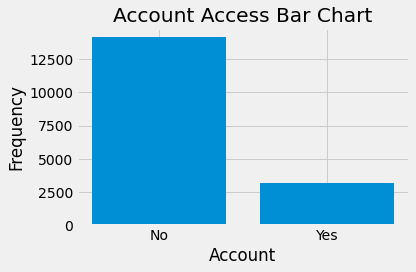

In [330]:
#Respondents with an account bar chart
plt.bar(f['account'], f['frequency'])
plt.title("Account Access Bar Chart")
plt.xlabel("Account")
plt.ylabel("Frequency")
plt.tight_layout()
plt.show()

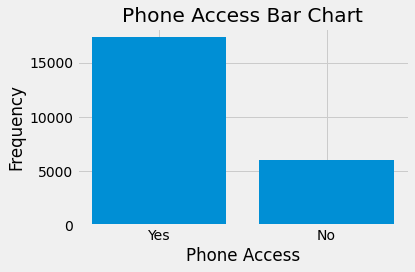

In [331]:
#Respondents with phone access
b = data4.phone_access.value_counts()
b.to_frame()
k = b.reset_index(name = 'frequency').rename(columns = {'0':'', 'index':'phone_access'})
k
plt.bar(k['phone_access'], k['frequency'])
plt.title("Phone Access Bar Chart")
plt.xlabel("Phone Access")
plt.ylabel("Frequency")
plt.tight_layout()
plt.show()
# Bar chart reveals a higher number of the respondents had access to a cell phone

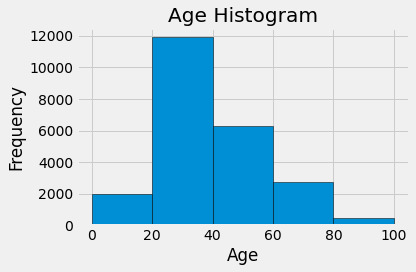

In [333]:
#Histogram of Respondents' Ages

bins = [0,20,40,60,80,100]
plt.hist(data4['age'],bins = bins, edgecolor ='black' )
plt.title("Age Histogram")
plt.xlabel("Age")
plt.ylabel("Frequency")
plt.tight_layout()
plt.show()

#The Histogram indicates majority of the respondents ages lies between 20-40 years

In [334]:
#Descriptive statistics of data4
data4.describe()

#Results below indicate standard deviation of 2 and 17 for household and age respectively
#standard deviation of 2 means the mean and median household values are close to each other and the curve is tall and narrow
#standard deviation of 17 means the mean and median age values are close to each other and the curve is short and wide

,household,age
count,"23,336","23,336"
mean,4,39
std,2,17
min,1,16
25%,2,26
50%,3,35
75%,5,49
max,16,100


In [335]:
#Finding median
data4.median()

year        2,017
household       3
age            35
dtype: float64

In [336]:
#Checking Skewness
data4.skew()

#The household numbers and age are skewed to the right by 1 indicating they are almost approaching
#a normal distribution curve. The year is a perfect normal distribution

year        0
household   1
age         1
dtype: float64

In [337]:
#Checking Kurtosis
#skewness and/or kurtosis that exceed +/-1 are considered non-normal
data4.kurtosis()

#From the results, Age and household have normal peaks indicating normal distributions 

year        -2
household    1
age          0
dtype: float64

In [338]:
#Checking Variance
data4.var()

#Results show a very high variance in age indicating the ages of respondents are 
#very spread out from the average age of 39 years

household     5
age         273
dtype: float64

In [339]:
#Inter Quartile Range as a measure of dispersion
lowerquantile = data4.quantile(0.25)
upperquantile = data4.quantile(0.75)
IQRange = upperquantile - lowerquantile
print(IQRange)

#The values indicate a lower dispersion in household and higher dispersion in age of respondents

household    3
age         23
dtype: float64


######Recommendations



1.   We must obtain a different dataset that contains numerical variables that are both continuous and discrete ones to proper analyse the data
2.   



######Bivariate summaries

In [350]:
#Correlation using Pearsons Coefficient

#Encoding job_type from ordinal to numerical

list1  =['No Income','Dont Know/Refuse to answer']
list2 = ['Other Income']
list3  =['Remittance Dependent', 'Government Dependent']
list4  =['Self employed','Farming and Fishing']
list5 = ['Formally employed Private', 'Informally employed','Formally employed Government']

data5['job_type_encoded'] = data4['job_type'].map({'list1':0, 'list2':1,'list3':2,'list4':3,'list5':4, })

#Encoding account access from nominal to numerical
data5['account_encoded'] = data4['account'].map({'Yes':1, 'No':0})

#label-encoding education from ordinal to numerical
data5['education_encoded'] = data4['education'].map({'No formal education':0, 'Other/Dont know/RTA':1,'Primary education':2, 'Secondary education':3, 'Vocational/Specialised training':4,'Tertiary education':5 })

#correlation betweeen level of education and account access is weak
pearson_coeff = data5["account_encoded"].corr(data5["education_encoded"], method="pearson") 
print("Education and account access:", pearson_coeff)

#There is no correlation between type of job and account access
pearson_coeff1 = data5["account_encoded"].corr(data5["job_type_encoded"], method="pearson") 
print("Job type and account access:", pearson_coeff1)

#There is no correlation between Age and account access
pearson_coeff2 = data5["account_encoded"].corr(data5["age"], method="pearson") 
print("Age and account access:", pearson_coeff2)

#There is no correlation between Household size and account access
pearson_coeff2 = data5["account_encoded"].corr(data5["household"], method="pearson") 
print("Household size and account access:", pearson_coeff2)

Education and account access: 0.3247126581648607
Job type and account access: nan
Age and account access: 0.01940857412669863
Household size and account access: -0.024112588039648646


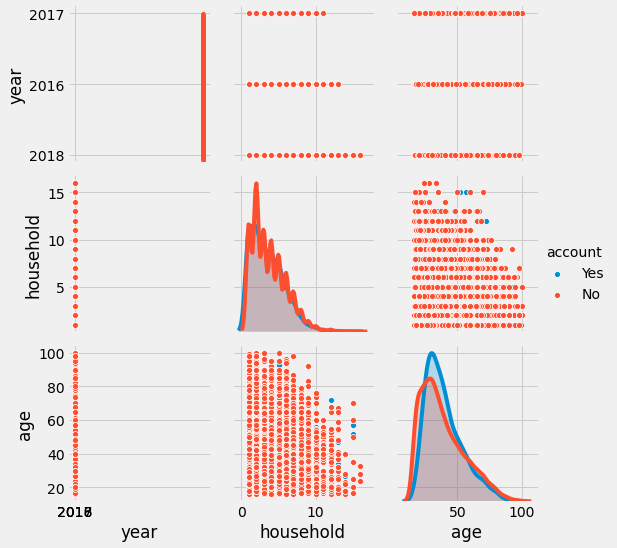

In [351]:
# Ploting the bivariate summaries and recording our observations

#Using a ScatterPlot Matrix to see access to an account compared to age and number of respondents

plt.style.use('fivethirtyeight')

sns.pairplot(data4, hue="account")

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:22: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.


Text(0, 0.5, 'Respondents/Frequency')

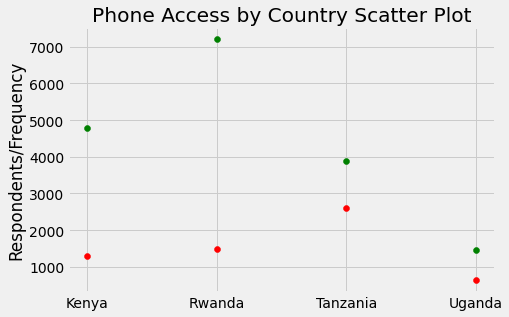

In [354]:
#p dataframe is from univariate summaries

#Scatterplot

p['phone_access_encoding'] = p['phone_access'].map({'Yes':1, 'No':0})

fig = plt.figure()
plt.rcParams['figure.figsize'] = [15,10]
fontdict={'fontsize': 25,
          'weight' : 'bold'}

fontdicty={'fontsize': 18,
          'weight' : 'bold',
          'verticalalignment': 'baseline',
          'horizontalalignment': 'center'}

ax1 = fig.add_subplot(221)
ax1.scatter('country', 'frequency', data=p[p['phone_access_encoding']==1], c="green")
ax1.set_title('Phone Access by Country Scatter Plot', color="black")
ax1.set_ylabel("Number of Respondents/Frequency")

ax2 = fig.add_subplot(221)
ax2.scatter('country', 'frequency', data=p[p['phone_access_encoding']==0], c="red")
ax2.set_title('Phone Access by Country Scatter Plot', color="black")
ax2.set_ylabel("Respondents/Frequency")

#Scatter plot shows Rwanda has highest number of respondents with access to phones
#Tanzania has highest number of respondents with no access to phones

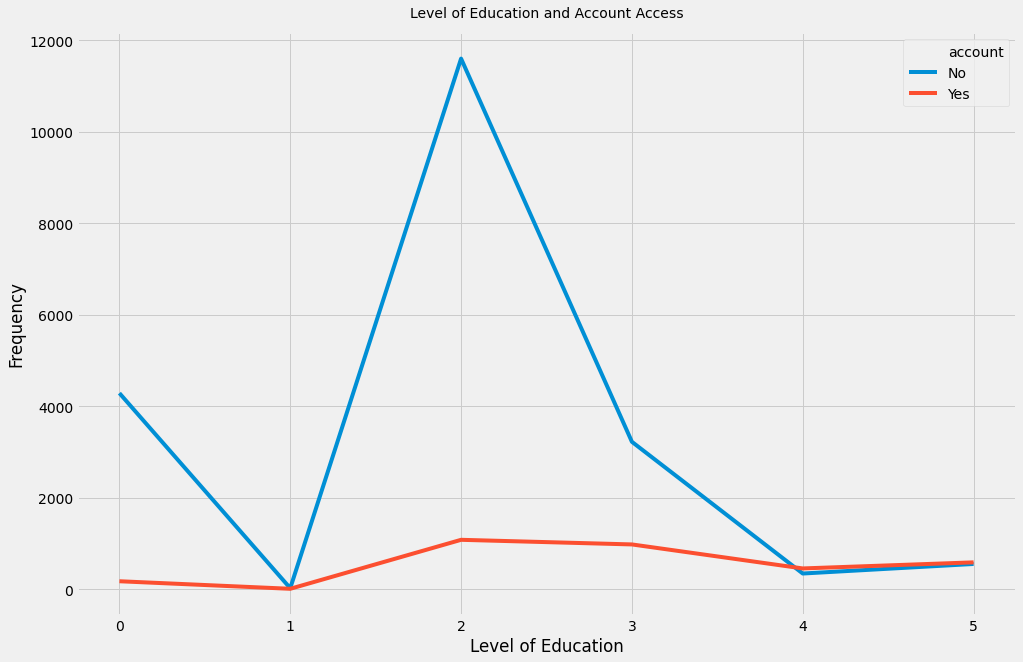

In [355]:
#Categorical and numerical

#Line Chart showing level of education vs access to an account

#label-encoding education to numerical
data4['education_encoded'] = data4['education'].map({'No formal education':0, 'Other/Dont know/RTA':1,'Primary education':2, 'Secondary education':3, 'Vocational/Specialised training':4,'Tertiary education':5 })

n = data4.groupby(['account','education_encoded']).size().reset_index(name = 'frequency').rename(columns = {'0':''})

n_new = sns.lineplot(x="education_encoded", y="frequency", hue="account", data=n)
# Giving a title to our line graph
plt.title("Level of Education and Account Access", fontsize=14, y=1.015)

# Labelling the y-axis
plt.ylabel('Frequency')

# Labelling the x-axis
plt.xlabel('Level of Education')

# Displaying our graph
plt.show()

#The line graphm shows the level of education does not equate to financial inclusion\access to an account but 
#there is a small relationship between levels of education 1 and 2 .ie more tertiary level respondents have access to an account


######Recommendations



*  We must have a dataset that contains continuous numerical variables
*  We must be given a dataset that contains the populations of the respective countries and the standard deviations so we can perform a Z-score test to accept or reject the null hypothesis. Otherwise a t-test would suffice.







######Multivariate summaries

In [ ]:
#Testing for Multicollinearity

from scipy import stats
import matplotlib.pyplot as plt
import statsmodels.api as sm
from statsmodels.stats import diagnostic as diag
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
%matplotlib inline

data4_before = data4

#Creating a series for both
X1 = sm.tools.add_constant(data4_before)

series_before = pd.Series([variance_inflation_factor(X1.values,i) for i in range(X1.shape[1])], index = X1.columns)

#displaying the series
print("Data Before")
print("-"*100)
display(series_before)




In [ ]:
#Reduction Technique using Principal Component Analysis

%matplotlib inline
from sklearn.preprocessing import StandardScaler # for standardizing the Data
from sklearn.decomposition import PCA # for PCA calculation


#Encoding country from ordinal to numerical
data5['country_encoded'] = data4['country'].map({'Kenya':0, 'Uganda':1,'Tanzania':2, 'Rwanda':3})

#Encoding year from ordinal to numerical
data5['year_encoded'] = data4['year'].map({'2016':0, '2017':1,'2018':2})

#Encoding location from nominal to numerical
data5['location_encoded'] = data4['location'].map({'Urban':0, 'Rural':1})

#Encoding r-gender from nominal to numerical
data5['r_gender_encoded'] = data4['r_gender'].map({'Urban':0, 'Rural':1})

#Encoding phone_access from nominal to numerical
data5['phone_access_encoded'] = data4['phone_access'].map({'Yes':1, 'No':0})

data6 = data5.drop(['country', 'phone_access','year', 'account', 'location', 'household','r_gender', 'role', 'marital_status', 'education', 'job_type'], axis = 1)

#Dropping nan values
data7 = data6.drop(['job_type_encoded', 'r_gender_encoded'], axis = 1)
# getting all values as a matrix of dataframe
X = data6.values

sc = StandardScaler() # creating a StandardScaler object

X_std = sc.fit_transform(X) # standardizing the data

pca = PCA()
X_pca = pca.fit(X_std)



######Recomendations 

1.   To effectively perform Univariate and Multivariate analysis, the dataset must contain some numerical variables which are continuous. Not just ordinal, nominal and categorical variables.
2.   Variables like income should be included in the dataset.



## 7. Implementing the Solution

In [ ]:
#Its challenging to implement the solution when the dataset does not have all the necessary statistical data types for variables

## 8. Challenging the solution

> Some few metrics for success were obtained as described in the comments in the analysis figures/plots. However, I challenge those solutions because its was not possible to fully exhaust univariate, bivariate and multivariate analysis on the current dataset provided.





## 9. Follow up questions

### a). Did we have the right data?


*   We did not have the right data



### b). Do we need other data to answer our question?

*   We need additional data to answer the question. Data that contains variables such as income/salary, sales, profits etc



### c). Did we have the right question?



*   The question was somewhat correct but can be improved if the right dataset is provided.

